In [2]:
!pip install eli5 shap

     |████████████████████████████████| 106 kB 9.0 MB/s 
     |████████████████████████████████| 564 kB 51.8 MB/s 


In [5]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# ML
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC # 회귀 모형, 분류 모형
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

#평가
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report

# 교차검증
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, train_test_split

# Feauter Selection
from sklearn.feature_selection import RFE, RFECV

# 시각화(SVM은 회귀계수가 나오지 않습니다.)
import eli5
from eli5.sklearn import PermutationImportance
import shap

In [9]:
def contours2D(model, x1, x2, h=0.01, **params):
  xx1, xx2 = np.meshgrid(
    np.arange(x1.min() - 0.1, x1.max() + 0.1, h), 
    np.arange(x2.min() - 0.1 , x2.max() + 0.1 , h)
  )

  y = model.predict(np.c_[xx1.flatten(), xx2.flatten()])
  y = y.reshape(xx1.shape)
  result = plt.contourf(xx1, xx2, y, **params)
  return result

# KNN(K-Nearst Neighbors)
- k- 최근접 이웃 알고리즘
- 다수결의 원칙에 따라 주어진 값 근처에 있는 y 개수가 많은 쪽으로 분류


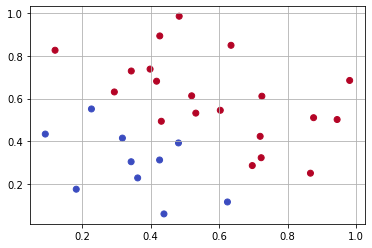

In [11]:
np.random.seed(123)
x = np.random.rand(30,2)
y = np.zeros(len(x))
y[-4/5 + 3/4 * x[:,0] + 1 * x[:,1] > 0] = 1

x1, x2 = x[:,0], x[:, 1]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.grid()
plt.show()

- n_ neighbors : K값, 주변에 몇개까지 확인할 것인지
-

In [7]:
model = KNeighborsClassifier(n_neighbors=3, weights='uniform')
model.fit( x, y )

KNeighborsClassifier(n_neighbors=3)

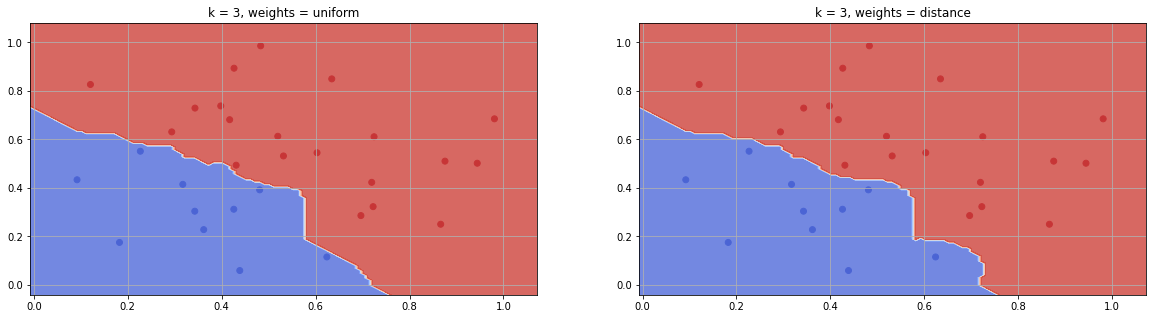

In [13]:
plt.figure( figsize=(20, 5))

plt.subplot( 1, 2, 1)
model = KNeighborsClassifier(n_neighbors=3, weights='uniform').fit(x, y)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
contours2D( model, x1, x2, cmap='coolwarm', alpha=0.8 )
plt.title('k = 3, weights = uniform')
plt.grid()

plt.subplot( 1, 2, 2)
model = KNeighborsClassifier(n_neighbors=3, weights='distance').fit(x, y)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
contours2D( model, x1, x2, cmap='coolwarm', alpha=0.8 )
plt.title('k = 3, weights = distance')
plt.grid()

plt.show()

복잡한 모형

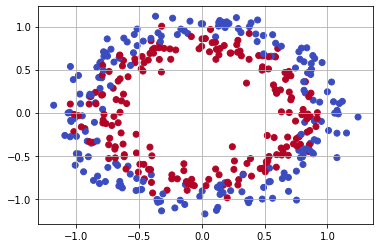

In [14]:
x, y = datasets.make_circles(n_samples=400, noise=0.1, random_state=410)
x1, x2 = x[:, 0], x[:, 1]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.grid()
plt.show()

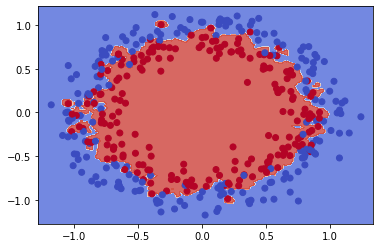

In [18]:
model = KNeighborsClassifier(n_neighbors=3, weights='distance').fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')

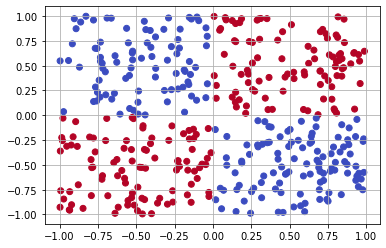

In [19]:
np.random.seed(410)
x = np.random.uniform(-1,1, (400,2))
y = np.zeros((400), dtype=np.int32)
y[ x[:,0] * x[:,1] > 0] = 1

x1, x2 = x[:, 0], x[:, 1]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.grid()
plt.show()

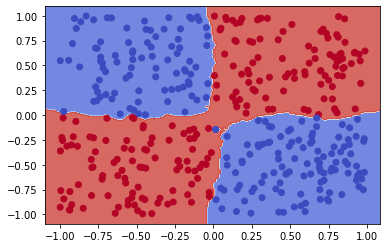

In [20]:
model = KNeighborsClassifier(n_neighbors=11, weights='distance').fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')

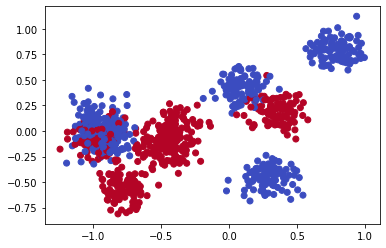

In [21]:
x, y = datasets.make_blobs( 
  n_samples=1000, center_box=(-1, 1), centers=10, cluster_std=0.1, random_state=3)
y %= 2

x1, x2 = x[:, 0], x[:, 1]
plt.scatter( x[:, 0], x[:, 1], c=y, cmap='coolwarm')

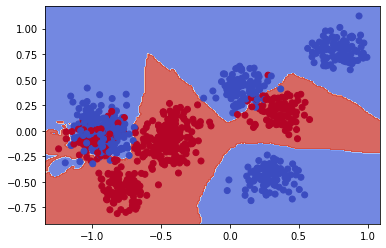

In [22]:
model =  KNeighborsClassifier(n_neighbors=11, weights='distance').fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')

# 회귀

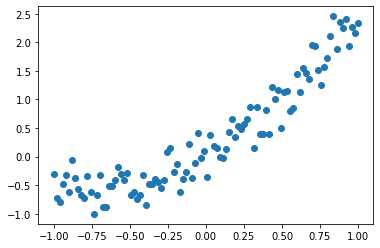

In [23]:
np.random.seed(123)
x = np.linspace(-1, 1, 100)
y = x ** 2 + 1.5 * x + 0.5 * (2 * np.random.rand(len(x))-1)

plt.plot( x, y, 'o')

In [24]:
model = KNeighborsRegressor(n_neighbors=100, weights='uniform').fit(x.reshape(-1,1), y)

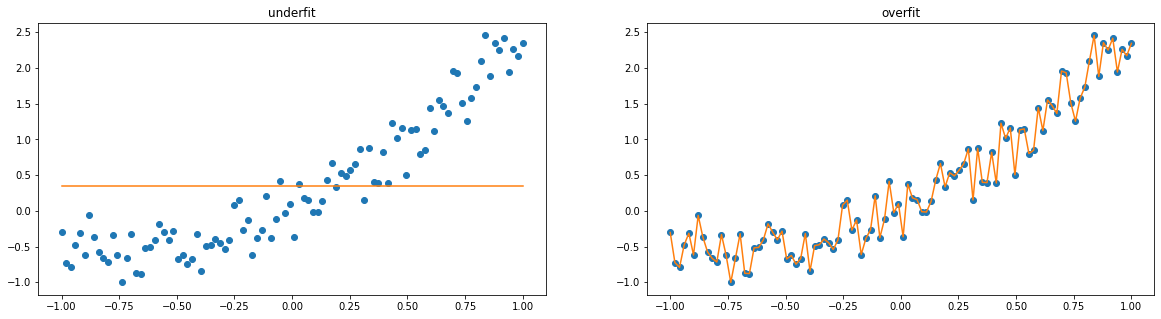

In [26]:
plt.figure( figsize=(20, 5))

plt.subplot(1, 2, 1)
model = KNeighborsRegressor(n_neighbors=100, weights='uniform').fit(x.reshape(-1,1), y)
plt.plot( x, y, 'o')
plt.plot( x, model.predict( x.reshape(-1,1)))
plt.title('underfit')

plt.subplot(1, 2, 2)
model = KNeighborsRegressor(n_neighbors=100, weights='distance').fit(x.reshape(-1,1), y)
plt.plot( x, y, 'o')
plt.plot( x, model.predict( x.reshape(-1,1)))
plt.title('overfit')

plt.show()

# 최적의 파라미터?
- param 사용

In [41]:
kfolds = KFold( n_splits=20, shuffle=True)

In [42]:
params = {
  'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
  'weights': ['uniform', 'distance'],
}

model = KNeighborsRegressor()
search = GridSearchCV( model, param_grid=params, scoring='r2', cv=kfolds)
results = search.fit( x.reshape(-1,1), y )

In [43]:
print(results.best_params_)
best_model = results.best_estimator_

{'n_neighbors': 7, 'weights': 'uniform'}


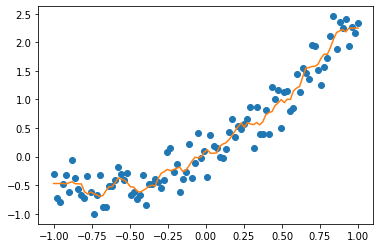

In [44]:
plt.plot( x, y, 'o')
plt.plot( x, best_model.predict( x.reshape(-1,1)))
plt.show()